# Лабораторна №2

С помощью Pygmo найти минимум функции оптимизации

## Three-Hump

In [2]:
def f (x,y):
    return 2*(x**2)-1.05*(x**4)+((x**6)/6)+(x*y)+(y**2)

In [5]:
import matplotlib
import numpy as np
import pygmo as pg
import math
from matplotlib import pyplot as plt

In [27]:
class ThreeH:
    def __init__(self,x_min,x_max,y_min,y_max) -> None:
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
    
    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self,x):
        functionValue = 2*(x[0]**2)-1.05*(x[0]**4)+((x[0]**6)/6)+(x[0]*x[1])+(x[1]**2) #cannot use ** ??
        return [functionValue]

In [28]:
udp = ThreeH(-5,5,-5,5)

problem = pg.problem(udp)

print(problem)

Problem name: <class '__main__.ThreeH'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [29]:
N = 1

seed = 5123121

dAlg = pg.de(gen=N,seed=seed)

algorithm = pg.algorithm(dAlg)

print(algorithm)

Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: pagmo::de

	Thread safety: basic

Extra info:
	Generations: 1
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 5123121


In [30]:
populationSize = 1000

population = pg.population(problem, size=populationSize, seed=seed)

#print(population)

In [31]:
evolutionsN = 100

individualsList = []
fitnessList = []

for i in range(evolutionsN):
    population = algorithm.evolve(population)
    individualsList.append(population.get_x()[population.best_idx()])
    fitnessList.append(population.get_f()[population.best_idx()])

print(f"Fitness value -> {population.champion_f}")
print(f"Decision vector -> {population.champion_x}")
print(f"Number of function evals -> {population.problem.get_fevals()}")
print(f"Difference wrt -> {population.champion_x - np.array([3,2])}")

Fitness value -> [1.38693957e-17]
Decision vector -> [1.40512242e-09 2.52455049e-09]
Number of function evals -> 101000
Difference wrt -> [-3. -2.]


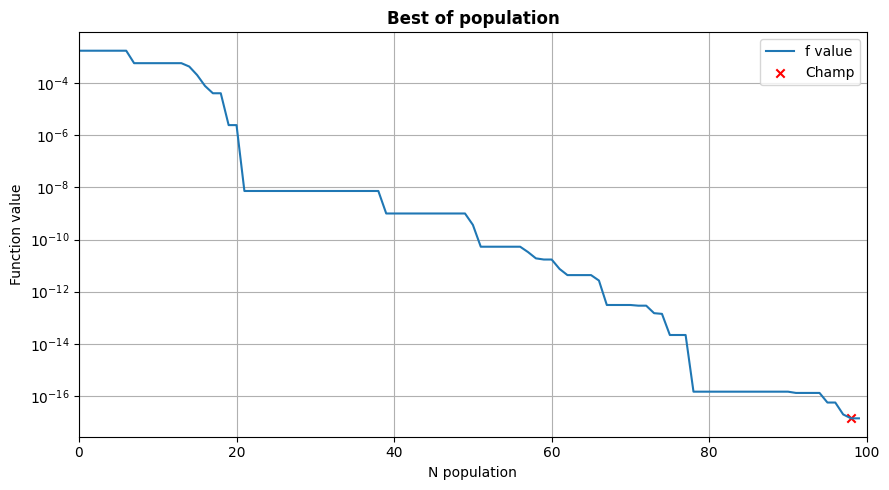

In [32]:
best_x = [i[0] for i in individualsList]
best_y = [i[1] for i in individualsList]

(x_min, y_min), (x_max, y_max) = udp.get_bounds()

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, evolutionsN), fitnessList, label='f value')

champion_n = np.argmin(np.array(fitnessList))
ax.scatter(champion_n, np.min(fitnessList), marker='x', color='r', label='Champ')

ax.set_xlim((0, evolutionsN))
ax.grid('major')
ax.set_title('Best of population', fontweight='bold')
ax.set_xlabel('N population')
ax.set_ylabel("Function value")
ax.legend(loc='upper right')
ax.set_yscale('log')
plt.tight_layout()

# Показ
plt.show()

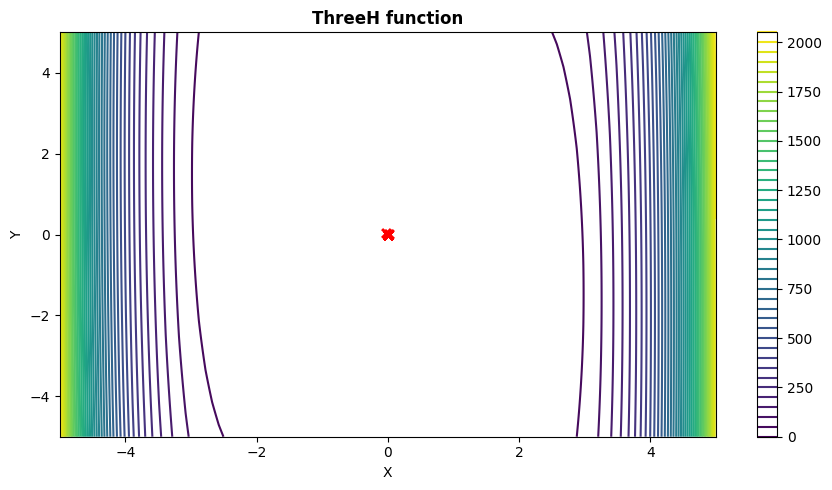

In [33]:
grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = udp.fitness([x_grid[i, j], y_grid[i, j]])[0]

# Create figure
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

# Показываем лучших представителей за каждое поколение
ax.scatter(best_x, best_y, marker='x', color='r')

# Оформление
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('ThreeH function', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
plt.tight_layout()

# Показ
plt.show()